## Ex2

•	Passer d'un couple image + fichier vecteur bâtiment à une image masque de bâtiment avec les pixels bâtiment ayant une valeur 1 et les autres 0.

Etapes : 

-	Pour la lecture du fichier vecteur. regarder soit la librairie fiona (https://fiona.readthedocs.io/en/latest/manual.html) lecture fichier en mode stream et sous forme de json (avec information geo) ou geopandas (https://geopandas.org/) qui lit en fichier sous forme de dataframe pandas avec une colonne geometry. Geopandas peut être plus simple si tu connais déjà la librairies python pandas.

-	Pour la rasterization il faut regarder du côté de la méthode rasterio.features.rasterize de la librairie rasterio


In [51]:
import geopandas as gpd
import os 
import rasterio
from rasterio.plot import reshape_as_image
import rasterio.mask
from rasterio.features import rasterize

import numpy as np 
import cv2
import matplotlib.pyplot as plt

from shapely.geometry import mapping, Point, Polygon
from shapely.ops import cascaded_union

In [52]:
os.listdir('./IMAGES/A1_RVB')

['readme.txt',
 'rvb.vrt',
 'zone_1.tif',
 'zone_2.tif',
 'zone_3.tif',
 'zone_4.tif',
 'zone_5.tif']

### Read files & get geomtry feetures

In [53]:
# read shapefile with geopandas 
buildings = gpd.read_file('./MASKS/mask_bati_33_2018.shp')

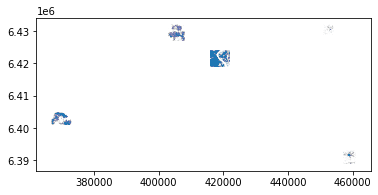

In [54]:
buildings.plot()
plt.show()

In [55]:
# get the shape 
shapes = [(geom, 1) for geom in buildings.geometry]

### Read image & get metadata

In [56]:
# open raster file 
rst = rasterio.open("./IMAGES/A1_RVB/zone_1.tif")

In [57]:
# copy metadata 
meta = rst.meta.copy()

In [58]:
print(meta)

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 30000, 'height': 20000, 'count': 3, 'crs': CRS.from_epsg(2154), 'transform': Affine(0.2, 0.0, 367000.0,
       0.0, -0.2, 6405000.0)}


### Create an image 

In [59]:
# number of band : 1 
meta.update(count=1)

In [62]:
# Write a new tif file 
with rasterio.open("./new_1.tif", 'w+', **meta) as out:
    out_arr = out.read(1)

### Create numpy array with rasterio

In [63]:
# Create a mask 
burned = rasterize(shapes=shapes, fill=0, out=out_arr, transform=out.transform)

In [64]:
print(burned)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Result

In [66]:
out_file = rasterio.open("./new_1.tif",'w+',**meta)

In [67]:
print(out_file.read())

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [68]:
print(out_file.meta)

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 30000, 'height': 20000, 'count': 1, 'crs': CRS.from_epsg(2154), 'transform': Affine(0.2, 0.0, 367000.0,
       0.0, -0.2, 6405000.0)}


In [69]:
# Write the mask 
out_file.write_band(1, burned)

In [70]:
out_file.read()

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

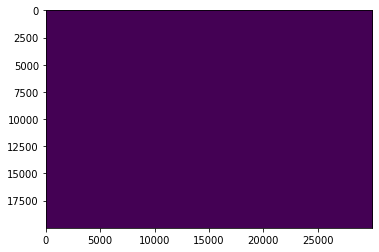

In [71]:
plt.imshow(np.dstack(out_file.read_masks()))
plt.show()

## Other Method

In [ ]:
src_rvb = rasterio.open("./IMAGES/A1_RVB/zone_1.tif")

### Reading dataset masks

In [21]:
src_rvb.read_masks(1)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [22]:
metadata = src_rvb.meta

In [23]:
raster_img = src_rvb.read()

In [24]:
metadata

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 30000,
 'height': 20000,
 'count': 3,
 'crs': CRS.from_epsg(2154),
 'transform': Affine(0.2, 0.0, 367000.0,
        0.0, -0.2, 6405000.0)}

In [25]:
# reshaping rasters
raster_img = reshape_as_image(raster_img)

### Visualize Image

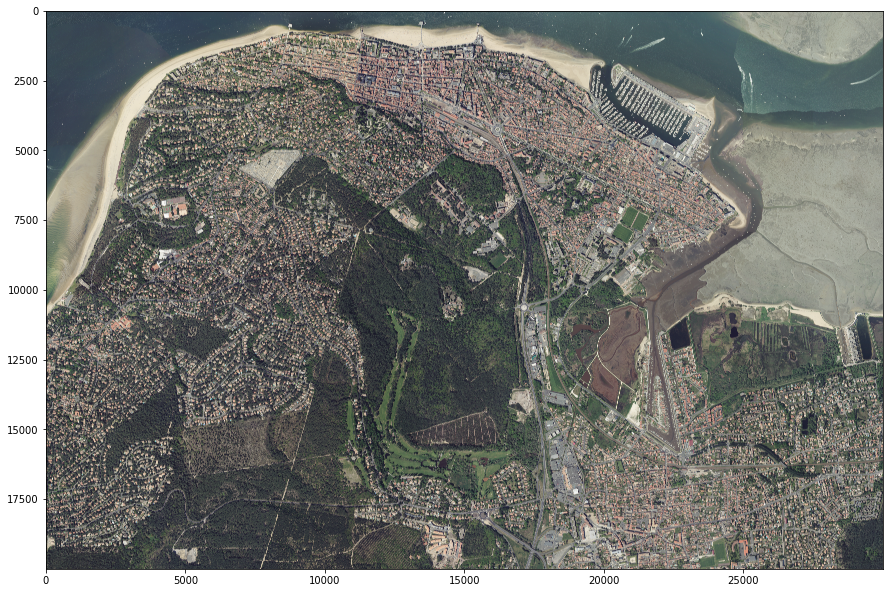

In [26]:
plt.figure(figsize=(15,15))
plt.imshow(raster_img)

### Loading ShapeFile with Geopandas 

In [27]:
gdf = gpd.read_file('./MASKS/mask_bati_33_2018.shp')

In [28]:
gdf.head()

,FID,layer,geometry
0,0,mask_bati_33_2018_zone1,"POLYGON Z ((367053.900 6401640.300 9.200, 3670..."
1,1,mask_bati_33_2018_zone1,"POLYGON Z ((370681.800 6401189.500 -1000.000, ..."
2,2,mask_bati_33_2018_zone1,"POLYGON Z ((371985.000 6402044.000 7.400, 3719..."
3,3,mask_bati_33_2018_zone1,"POLYGON Z ((368675.900 6403294.800 -1000.000, ..."
4,4,mask_bati_33_2018_zone1,"POLYGON Z ((370525.500 6402795.600 6.200, 3705..."


In [29]:
print("CRS Raster: {}, CRS Vector {}".format(gdf.crs, src_rvb.crs))

CRS Raster: epsg:2154, CRS Vector EPSG:2154


### Mask with Rasterio

In [30]:
gdf.crs = {'init':'epsg:2154'}
gdf = gdf.to_crs({'init':metadata['crs']['init']})

c:\programdata\anaconda3\envs\w1\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [31]:
# Generate a polygon
gdf.geometry

0         POLYGON Z ((367053.900 6401640.300 9.200, 3670...
1         POLYGON Z ((370681.800 6401189.500 -1000.000, ...
2         POLYGON Z ((371985.000 6402044.000 7.400, 3719...
3         POLYGON Z ((368675.900 6403294.800 -1000.000, ...
4         POLYGON Z ((370525.500 6402795.600 6.200, 3705...
                                ...                        
113671    POLYGON Z ((458951.200 6392486.900 74.200, 458...
113672    POLYGON Z ((458890.900 6392222.000 77.600, 458...
113673    POLYGON Z ((459349.100 6389021.400 40.000, 459...
113674    POLYGON Z ((459182.500 6392205.200 61.700, 459...
113675    POLYGON Z ((458925.600 6391409.800 24.300, 458...
Name: geometry, Length: 113676, dtype: geometry

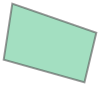

In [32]:
# cascased union : return a representation of union geometric objects 
cascaded_union(gdf.geometry[0])

In [33]:
gdf.columns

Index(['FID', 'layer', 'geometry'], dtype='object')

In [34]:
gdf.shape

(113676, 3)

In [35]:
gdf.geometry

0         POLYGON Z ((367053.900 6401640.300 9.200, 3670...
1         POLYGON Z ((370681.800 6401189.500 -1000.000, ...
2         POLYGON Z ((371985.000 6402044.000 7.400, 3719...
3         POLYGON Z ((368675.900 6403294.800 -1000.000, ...
4         POLYGON Z ((370525.500 6402795.600 6.200, 3705...
                                ...                        
113671    POLYGON Z ((458951.200 6392486.900 74.200, 458...
113672    POLYGON Z ((458890.900 6392222.000 77.600, 458...
113673    POLYGON Z ((459349.100 6389021.400 40.000, 459...
113674    POLYGON Z ((459182.500 6392205.200 61.700, 459...
113675    POLYGON Z ((458925.600 6391409.800 24.300, 458...
Name: geometry, Length: 113676, dtype: geometry

In [37]:
# Checking Coordinates 
gdf.geometry[0].exterior.coords.xy

(array('d', [367053.9, 367061.7, 367060.6, 367053.1, 367053.9]),
 array('d', [6401640.3, 6401637.6, 6401633.0, 6401635.1, 6401640.3]))

In [38]:
# Cut fields from raster 
failed = []
for num, row in gdf.iterrows():
    try:
        masked_image, out_transform = rasterio.mask.mask(src_rvb, [mapping(row['geometry'])], crop=True, nodata=0)
    except:
        failed.append(num)
print("Rasterio failed to mask {} files".format(len(failed)))

Rasterio failed to mask 91813 files


In [39]:
metadata['crs']

CRS.from_epsg(2154)

In [40]:
## Converting GeoDataframe to raster CRS 
# let's remove rows without geometry
gdf = gdf[gdf.geometry.notnull()]

# assigning crs
gdf.crs = {'init' :'epsg:2154'}

#transforming polygons to the raster crs
gdf = gdf.to_crs({'init' : metadata['crs']['init']})

c:\programdata\anaconda3\envs\w1\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [41]:
outfolder = "article"
os.makedirs(outfolder, exist_ok=True)
failed = []
for num, row in gdf.iterrows():
    try:
        masked_image, out_transform = rasterio.mask.mask(src_rvb, [mapping(row['geometry'])], crop=True, nodata=0)
        img_image = reshape_as_image(masked_image)
        img_path = os.path.join(outfolder, str(row['FID']) + '.png')
        #img_image = cv2.cvtColor(img_image, cv2.COLOR_RGB2BGR)
        #cv2.imwrite(img_path, img_image)
    except Exception as e:
#         print(e)
        failed.append(num)
print("Rasterio failed to mask {} files".format(len(failed)))

Rasterio failed to mask 91813 files


In [42]:
# rasterize works with polygons that are in image coordinate system

def poly_from_utm(polygon, transform):
    poly_pts = []
    
    # make a polygon from multipolygon
    poly = cascaded_union(polygon)
    for i in np.array(poly.exterior.coords):
        # transfrom polygon to image crs, using raster meta
        poly_pts.append(~transform * tuple(i))
        
    # make a shapely Polygon object
    new_poly = Polygon(poly_pts)
    return new_poly


In [43]:
src_rvb.meta['transform'][:]

(0.2, 0.0, 367000.0, 0.0, -0.2, 6405000.0, 0.0, 0.0, 1.0)

In [44]:
gdf.geometry[0].exterior.coords[0]

(367053.9, 6401640.3, 9.2)

In [46]:
# creating binary mask for field/not_filed segmentation.
"""
poly_shp = []
im_size = (src_rvb.meta['height'], src_rvb.meta['width'])
for num, row in gdf.iterrows():
    if row['geometry'].geom_type == 'Polygon':
        print(row['geometry'])
        poly = poly_from_utm(row['geometry'], src_rvb.meta['transform'][:])
        poly_shp.append(poly)
    else:
        for p in row['geometry']:
            poly = poly_from_utm(p, src_rvb.meta['transform'])
            poly_shp.append(poly)

mask = rasterize(shapes=poly_shp,
                 out_shape=im_size)

# plotting the mask
plt.figure(figsize=(15,15))
plt.imshow(mask)
"""

"\npoly_shp = []\nim_size = (src_rvb.meta['height'], src_rvb.meta['width'])\nfor num, row in gdf.iterrows():\n    if row['geometry'].geom_type == 'Polygon':\n        print(row['geometry'])\n        poly = poly_from_utm(row['geometry'], src_rvb.meta['transform'][:])\n        poly_shp.append(poly)\n    else:\n        for p in row['geometry']:\n            poly = poly_from_utm(p, src_rvb.meta['transform'])\n            poly_shp.append(poly)\n\nmask = rasterize(shapes=poly_shp,\n                 out_shape=im_size)\n\n# plotting the mask\nplt.figure(figsize=(15,15))\nplt.imshow(mask)\n"

Geometry Objects Attributes:

- area

- bounds

- length

- minimum_clearance

- geom_type

- distance


In [47]:
gdf.geometry[0].geom_type

'Polygon'

In [48]:
type(gdf.geometry[0])

shapely.geometry.polygon.Polygon

In [49]:
# area 
gdf.geometry[0].area

39.76499999926833

In [50]:
# bounds : minx, miny, maxx, maxy
gdf.geometry[0].bounds

(367053.1, 6401633.0, 367061.7, 6401640.3)